# Import Libraries
* python ver.: 3.9.12 

In [8]:
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Load Data

## 경로

In [2]:
path_to_current = os.path.abspath('./')
path_to_dataset = os.path.abspath('./open')

path_to_current, path_to_dataset

('e:\\VSCodeProjects\\dacon', 'e:\\VSCodeProjects\\dacon\\open')

## DataFrame

In [27]:
df_train = pd.read_csv(join(path_to_dataset, 'train_df.csv'), index_col='index')
df_test = pd.read_csv(join(path_to_dataset, 'test_df.csv'), index_col='index')

print(f"{len(df_train) = }\n{len(df_test) = }")

display(df_train.sample(5))
display(df_train.label.value_counts())

len(df_train) = 4277
len(df_test) = 2154


,file_name,class,state,label
index,,,,
2486,12486.png,hazelnut,cut,hazelnut-cut
2965,12965.png,bottle,good,bottle-good
1892,11892.png,grid,good,grid-good
2829,12829.png,hazelnut,good,hazelnut-good
3962,13962.png,transistor,good,transistor-good


hazelnut-good                 391
screw-good                    320
carpet-good                   280
pill-good                     267
grid-good                     264
                             ... 
transistor-bent_lead            5
transistor-damaged_case         5
cable-cut_outer_insulation      5
wood-liquid                     5
wood-color                      4
Name: label, Length: 88, dtype: int64

### 클래스별 데이터 수

In [28]:
print(f"{len(df_train['class'].value_counts()) = }")  # df_train.class: syntax error
df_train['class'].value_counts()

len(df_train['class'].value_counts()) = 15


hazelnut      427
screw         381
pill          340
carpet        327
zipper        301
grid          294
leather       293
wood          278
capsule       275
tile          273
cable         271
metal_nut     268
bottle        241
transistor    233
toothbrush     75
Name: class, dtype: int64

### 파이그래프로 시각화

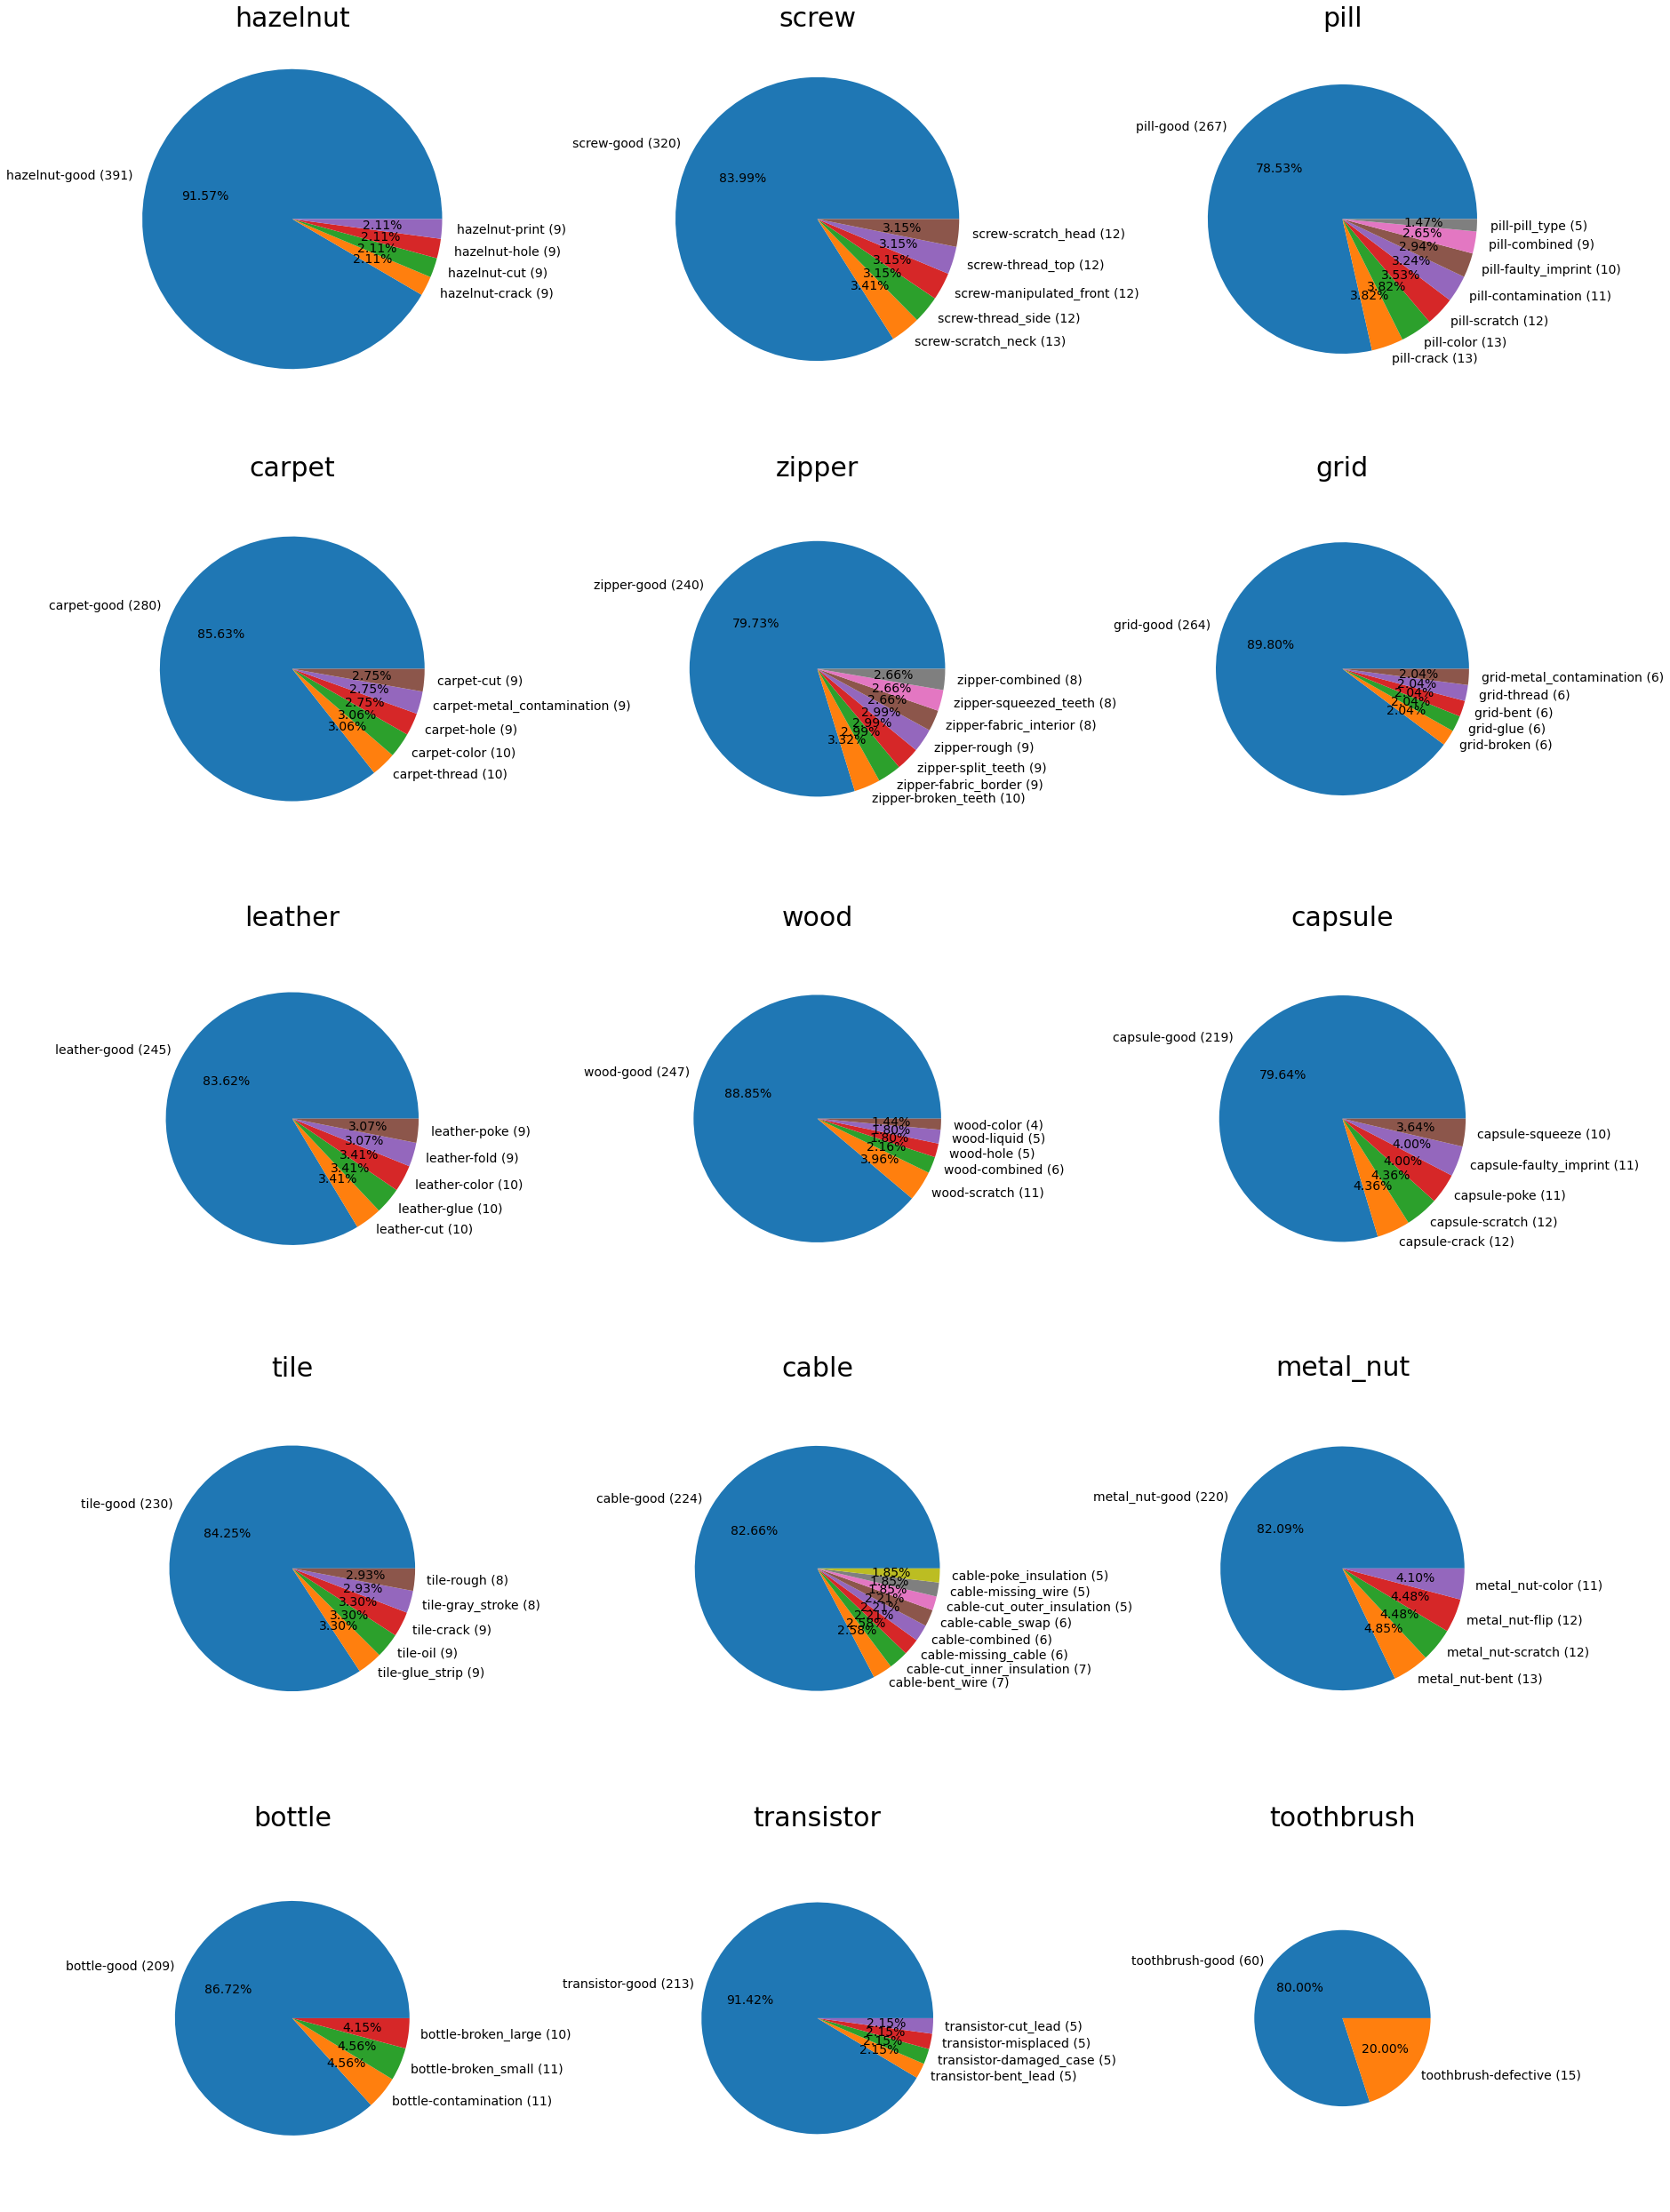

In [29]:
# 종류
items = list(df_train['class'].value_counts().index)
counts = df_train['class'].value_counts()

# Pie 그래프
num_col = 3
num_row = np.ceil(len(items) // num_col).astype(np.int64)
fig, axes = plt.subplots(num_row, num_col, facecolor='white', figsize=(num_col*10, num_row*9))

for i, item in enumerate(items):
    ax = axes[i // num_col, i % num_col]
    mask = df_train.label.str.contains(item)
    sr = df_train.label[mask].value_counts()
    labels = [f'{idx} ({val})' for idx, val in sr.items()]
    ax.pie(x=sr, labels=labels, autopct='%.2f%%', textprops={'fontsize': 14},
           radius=counts[item]/(counts.max()*2) + .5)   # 반지름 0.5 ~ 1로 조정
    ax.set_title(item, size=30)
    
plt.show()

* 구별해야하는 클래스의 개수에 비해 각 클래스마다의 데이터 수는 아주 적다.
* state가 good인 데이터가 아주 많지만 결국 하나 또는 몇가지를 제외하면 같은 데이터이므로 결함 데이터와의 개수는 크게 차이나지 않는다.
* 실질적으로 하나의 클래스마다 학습할 수 있는 데이터 수는 100개 이하로 아주 적어진다.

# 데이터 전처리

## Downsampling

In [31]:
df_train['class'].value_counts()

hazelnut      427
screw         381
pill          340
carpet        327
zipper        301
grid          294
leather       293
wood          278
capsule       275
tile          273
cable         271
metal_nut     268
bottle        241
transistor    233
toothbrush     75
Name: class, dtype: int64

In [ ]:
# 업로드 테스트